## Using GP as a optimizator

0 iteration with fitness = 0.0005107472160764681
10 iteration with fitness = 0.39420679129703384
20 iteration with fitness = 0.5723492740666282
30 iteration with fitness = 0.6675810226904788
40 iteration with fitness = 0.6954617152412463
50 iteration with fitness = 0.7051262382231638
60 iteration with fitness = 0.7247668938573311
70 iteration with fitness = 0.7277063892658726
80 iteration with fitness = 0.7414437898964807
90 iteration with fitness = 0.7501453519817918
The fittest individ: ((((6 * 1) * 0.9165)/(((6 * 1) * ((9/2.6803)/(6.5727 + (x0 + x0)))) + ((((4/x0) + x0) + (2.6803 * 0.9165))/((1/x0) * ((1/x0) * 9)))))/((x0 + ((-4 + ((1/x0) + x0))/((1/x0) * 9))) + (1/x0)))
with fitness 0.7553190899921529


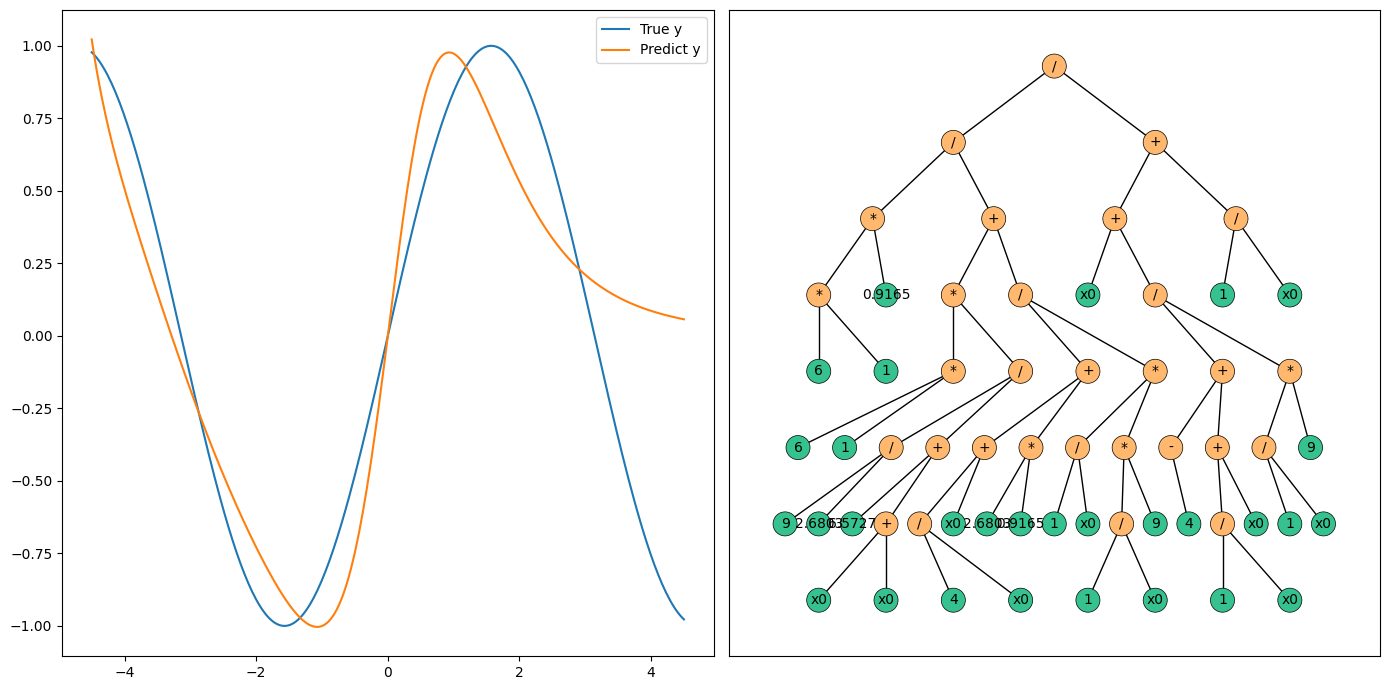

In [1]:
import numpy as np
from thefittest.optimizers import GeneticProgramming
from thefittest.tools import donothing
from thefittest.base import FunctionalNode
from thefittest.base import TerminalNode
from thefittest.base import EphemeralNode
from thefittest.base import UniversalSet
from thefittest.tools.operators import Mul
from thefittest.tools.operators import Add
from thefittest.tools.operators import Div
from thefittest.tools.operators import Neg
from thefittest.tools.metrics import coefficient_determination
import matplotlib.pyplot as plt
from thefittest.tools.print import print_tree

def generator1():
    return np.round(np.random.uniform(0, 10), 4)


def generator2():
    return np.random.randint(0, 10)


def problem(x):
    return np.sin(x[:,0])


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 300
n_dimension = 1

number_of_iterations = 100
population_size = 500

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = function(X)


functional_set = (FunctionalNode(Add()),
                  FunctionalNode(Mul()),
                  FunctionalNode(Neg()),
                  FunctionalNode(Div()))


terminal_set = [TerminalNode(X[:, i], f'x{i}') for i in range(n_dimension)]
terminal_set.extend([EphemeralNode(generator1), EphemeralNode(generator2)])
uniset = UniversalSet(functional_set, tuple(terminal_set))


def fitness_function(trees):
    fitness = []
    for tree in trees:
        y_pred = tree()*np.ones(len(y))
        fitness.append(coefficient_determination(y, y_pred))
    return np.array(fitness)


optimizer = GeneticProgramming(fitness_function=fitness_function,
                               genotype_to_phenotype=donothing,
                               uniset=uniset,
                               pop_size=population_size,
                               iters=number_of_iterations,
                               show_progress_each=10,
                               minimization=False,
                               keep_history=False, 
                               selection="tournament_k",
                               mutation="gp_weak_grow", 
                               tour_size=5,
                               max_level=7)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

predict = fittest['phenotype']()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X[:,0], y, label = "True y")
ax[0].plot(X[:,0], predict, label = "Predict y")
ax[0].legend()

print_tree(tree=fittest['phenotype'], ax=ax[1])


plt.tight_layout()
plt.show()

## Using SelfCGP as a optimizator

0 iteration with fitness = 0.009994233596277269
10 iteration with fitness = 0.31477216590723744
20 iteration with fitness = 0.3662859320819478
30 iteration with fitness = 0.5798485058183802
40 iteration with fitness = 0.5804183329585321
50 iteration with fitness = 0.5807127919940026
60 iteration with fitness = 0.5833803040176578
70 iteration with fitness = 0.5833803040176578
80 iteration with fitness = 0.5834029890924215
90 iteration with fitness = 0.5834029890924215
The fittest individ: ((x0/2.3449)/((-((-1 * (-9.5945/x0))/x0) * (9.5945 + ((x0/2.3449)/((-((-1 * (-9.5945/x0))/x0) * (9.5945 + ((6/(2.3449 + -((9.5945 * ((3.7961/x0)/x0))/x0)))/((-1 * (9.5945 + 2.6949))/x0))))/x0))))/x0))
with fitness 0.5834029890924215


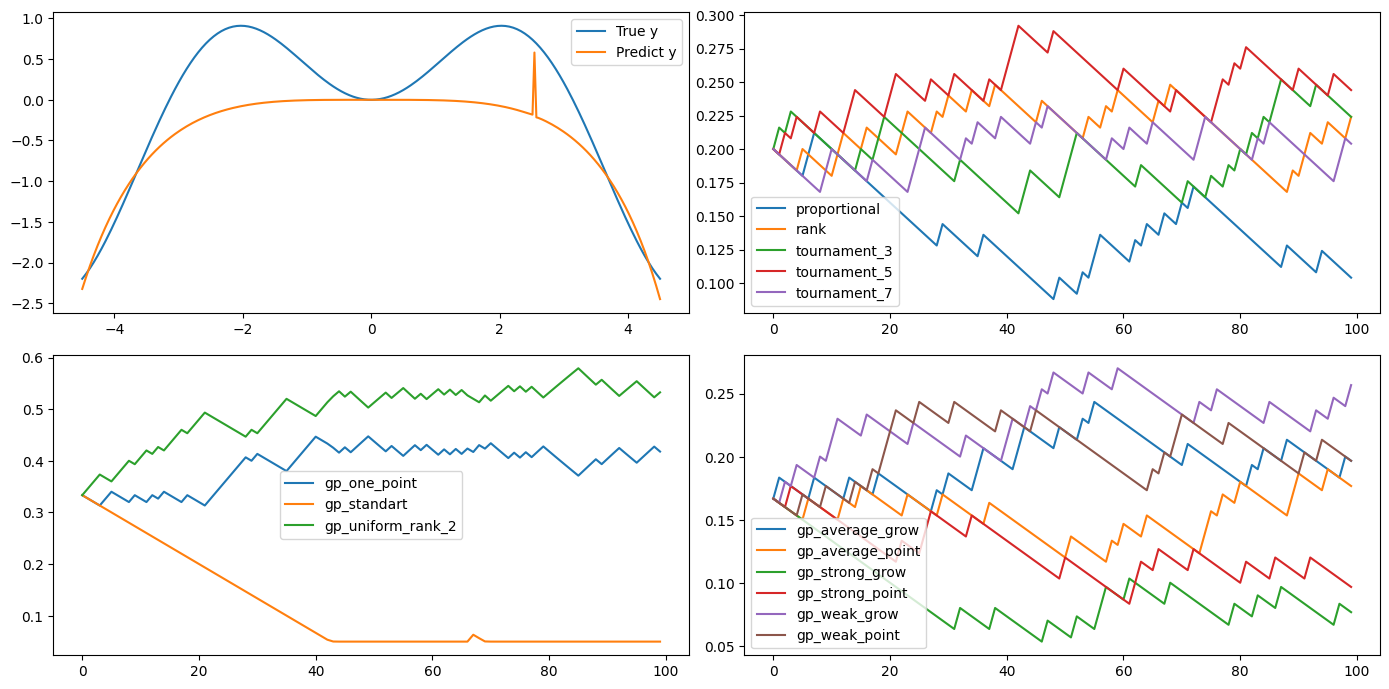

In [2]:
import numpy as np
from collections import defaultdict
from thefittest.optimizers import SelfCGP
from thefittest.tools import donothing
from thefittest.base import FunctionalNode
from thefittest.base import TerminalNode
from thefittest.base import EphemeralNode
from thefittest.base import UniversalSet
from thefittest.tools.operators import Mul
from thefittest.tools.operators import Add
from thefittest.tools.operators import Div
from thefittest.tools.operators import Neg
from thefittest.tools.metrics import coefficient_determination
import matplotlib.pyplot as plt


def generator1():
    return np.round(np.random.uniform(0, 10), 4)


def generator2():
    return np.random.randint(0, 10)


def problem(x):
    return np.sin(x[:,0])*x[:,0]*0.5


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 300
n_dimension = 1

number_of_iterations = 100
population_size = 500

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = function(X)


functional_set = (FunctionalNode(Add()),
                  FunctionalNode(Mul()),
                  FunctionalNode(Neg()),
                  FunctionalNode(Div()))


terminal_set = [TerminalNode(X[:, i], f'x{i}') for i in range(n_dimension)]
terminal_set.extend([EphemeralNode(generator1), EphemeralNode(generator2)])
uniset = UniversalSet(functional_set, tuple(terminal_set))


def fitness_function(trees):
    fitness = []
    for tree in trees:
        y_pred = tree()*np.ones(len(y))
        fitness.append(coefficient_determination(y, y_pred))
    return np.array(fitness)


optimizer = SelfCGP(fitness_function=fitness_function,
                    genotype_to_phenotype=donothing,
                    uniset=uniset,
                    pop_size=population_size,
                    iters=number_of_iterations,
                    show_progress_each=10,
                    minimization=False,
                    keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

predict = fittest['phenotype']()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)


ax[0][0].plot(X[:,0], y, label = "True y")
ax[0][0].plot(X[:,0], predict, label = "Predict y")
ax[0][0].legend()

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()

## Using GP as a machine learning model

0 iteration with fitness = 0.05498222550386156
10 iteration with fitness = 0.3205939404874234
20 iteration with fitness = 0.3205939404874234
30 iteration with fitness = 0.3205939404874234
40 iteration with fitness = 0.40771892663465603
50 iteration with fitness = 0.5250282246763559
60 iteration with fitness = 0.5895758421137678
70 iteration with fitness = 0.5895758421137678
80 iteration with fitness = 0.6860487643710946
90 iteration with fitness = 0.7382755187377035
100 iteration with fitness = 0.7429516952303443
110 iteration with fitness = 0.7464637972954473
120 iteration with fitness = 0.7467114583495961
130 iteration with fitness = 0.7521873376294541
140 iteration with fitness = 0.7521873376294541
150 iteration with fitness = 0.7521873376294541
160 iteration with fitness = 0.7610825286783335
170 iteration with fitness = 0.7668537576801118
180 iteration with fitness = 0.8332634793526288
190 iteration with fitness = 0.8419197961935532
The fittest individ: ((cos(--(0 * ((x0**2) + (((1

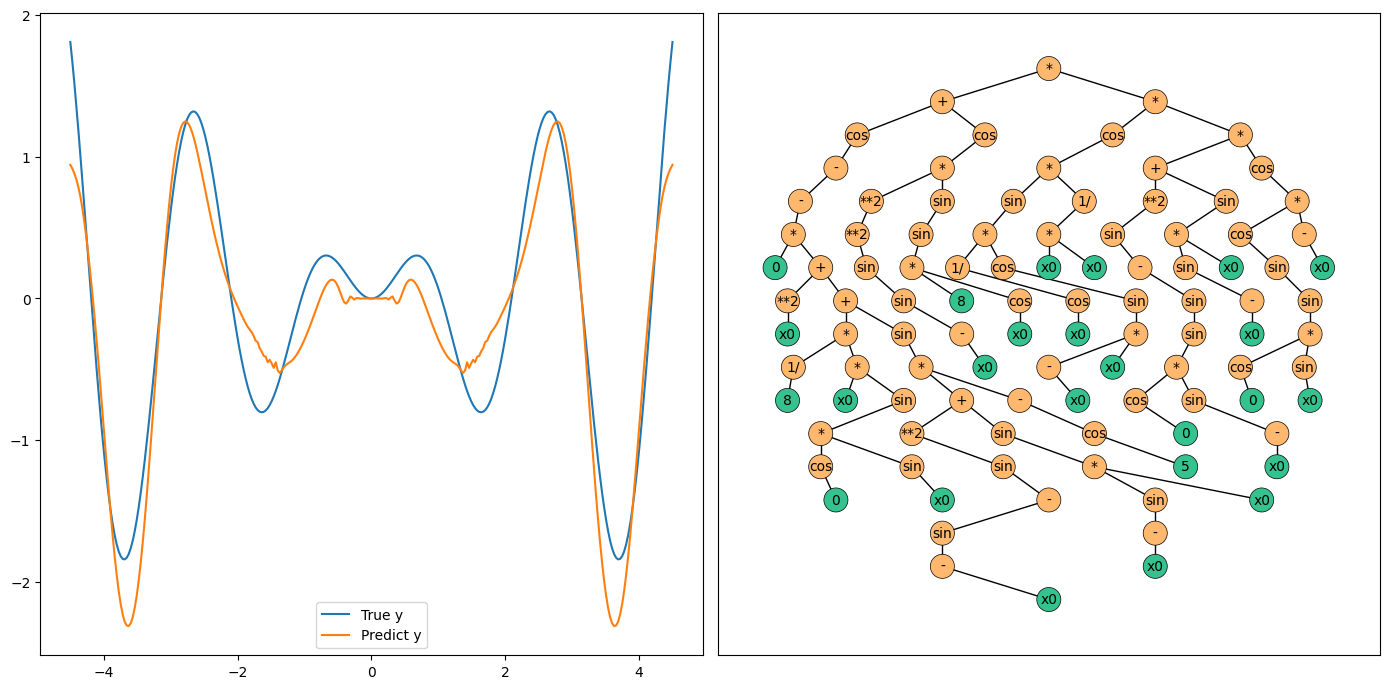

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from thefittest.regressors import SymbolicRegressionGP
from thefittest.optimizers import GeneticProgramming
from thefittest.tools.print import print_tree


def problem(x):
    return np.sin(x[:,0]*3)*x[:,0]*0.5


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 300
n_dimension = 1

number_of_iterations = 200
population_size = 1000

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = function(X)


model = SymbolicRegressionGP(iters=number_of_iterations,
                             pop_size=population_size,
                             optimizer=GeneticProgramming,
                             optimizer_args={"crossover": "gp_standart",
                                             "keep_history": True,
                                             "show_progress_each": 10,
                                             "elitism": False})

model.fit(X, y)

predict = model.predict(X)

fittest = model.get_optimizers()[0].get_fittest()
stats = model.get_optimizers()[0].get_stats()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X[:,0], y, label = "True y")
ax[0].plot(X[:,0], predict, label = "Predict y")
ax[0].legend()

print_tree(tree=fittest['phenotype'], ax=ax[1])


plt.tight_layout()
plt.show()

In [4]:
## Using SelfCGP as a machine learning model

0 iteration with fitness = -3.3352692607735435e-07
10 iteration with fitness = 0.19919405093630205
20 iteration with fitness = 0.591205919554763
30 iteration with fitness = 0.61117955341444
40 iteration with fitness = 0.61117955341444
50 iteration with fitness = 0.61117955341444
60 iteration with fitness = 0.61117955341444
70 iteration with fitness = 0.6514992220539982
80 iteration with fitness = 0.6559278909785745
90 iteration with fitness = 0.6712101326354147
100 iteration with fitness = 0.7203652804345059
110 iteration with fitness = 0.7270180699476453
120 iteration with fitness = 0.739491713633284
130 iteration with fitness = 0.740726719792514
140 iteration with fitness = 0.7451231407071869
150 iteration with fitness = 0.7498136222871663
160 iteration with fitness = 0.7533804638871895
170 iteration with fitness = 0.75535647086827
180 iteration with fitness = 0.7556104415937275
190 iteration with fitness = 0.7556104415937275
The fittest individ: ((sin((9 + cos(x0)))**2) * (sin((((1/

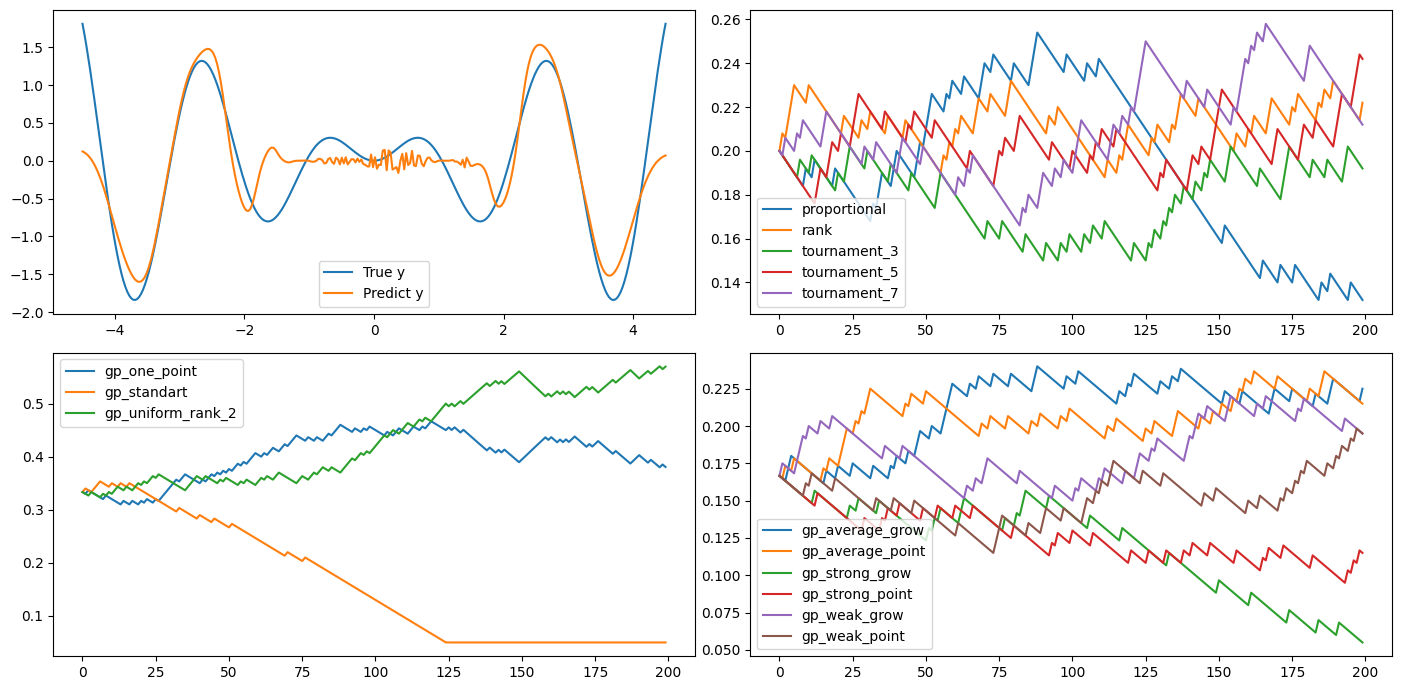

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from thefittest.regressors import SymbolicRegressionGP
from thefittest.optimizers import SelfCGP
from thefittest.tools.print import print_tree


def problem(x):
    return np.sin(x[:,0]*3)*x[:,0]*0.5


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 300
n_dimension = 1

number_of_iterations = 200
population_size = 1000

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = function(X)


model = SymbolicRegressionGP(iters=number_of_iterations,
                             pop_size=population_size,
                             optimizer=SelfCGP,
                             optimizer_args={"keep_history": True,
                                             "show_progress_each": 10,
                                             "elitism": True})

model.fit(X, y)

predict = model.predict(X)

fittest = model.get_optimizers()[0].get_fittest()
stats = model.get_optimizers()[0].get_stats()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)


ax[0][0].plot(X[:,0], y, label = "True y")
ax[0][0].plot(X[:,0], predict, label = "Predict y")
ax[0][0].legend()

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()